# RAMP on predicting cyclist traffic in Paris

Authors: *Roman Yurchak (Symerio)*; also partially inspired by the air_passengers starting kit.


## Introduction

The dataset was collected with cyclist counters installed by Paris city council in multiple locations. It contains hourly information about cyclist traffic, as well as the following features,
 - counter name
 - counter site name
 - date
 - counter installation date
 - latitude and longitude
 
Available features are quite scarce. However, **we can also use any external data that can help us to predict the target variable.** 

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Loading the data with pandas

First, download the data files,
 - [train.parquet](https://github.com/rth/bike_counters/releases/download/v0.1.0/train.parquet)
 - [test.parquet](https://github.com/rth/bike_counters/releases/download/v0.1.0/test.parquet)

and put them to into the data folder.


Data is stored in [Parquet format](https://parquet.apache.org/), an efficient columnar data format. We can load the train set with pandas,

In [3]:
data = pd.read_parquet(Path('data') / 'train.parquet')
data_test =pd.read_parquet(Path('data') / 'test.parquet')
data_test

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count
56474,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 05:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
56477,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2.0,2021-08-10 06:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.098612
56480,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 07:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
56483,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2021-08-10 09:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000
56486,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 10:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
929175,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,445.0,2021-09-09 06:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,6.100319
929178,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,145.0,2021-09-09 10:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,4.983607
929181,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,218.0,2021-09-09 15:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,5.389072
929184,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,21.0,2021-09-09 22:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.091042


We can check general information about different columns,

and in particular the number of unique entries in each column,

## Adding external data : Covid and holidays

In [40]:
import datetime

In [41]:
date = pd.to_datetime(df_ext['date'])
df_ext.loc[:, ['date_only']] = date

In [42]:


new_date = [dt.date() for dt in df_ext['date_only']]
    

df_ext.loc[:, ['date_only']] = new_date


In [43]:
mask = ((df_ext['date_only'] >= pd.to_datetime('2020/10/30'))
        & (df_ext['date_only'] <= pd.to_datetime('2020/12/15'))
        | (df_ext['date_only'] >= pd.to_datetime('2021/04/03'))
        & (df_ext['date_only'] <= pd.to_datetime('2021/05/03')))


df_ext['confi'] =0
df_ext.loc[mask,['confi']] = 1


/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [44]:
df_ext[df_ext['date_only'] == pd.to_datetime('2020/10/30')]

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,date_only,confi
644,7149,2020-10-30 00:00:00,102220,20,0,230,3.8,286.75,285.45,92,...,NaN,480.0,8.0,NaN,660.0,NaN,NaN,NaN,2020-10-30,1
645,7149,2020-10-30 03:00:00,102270,50,1,220,4.6,286.75,284.95,89,...,6.0,780.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1
646,7149,2020-10-30 06:00:00,102320,50,1,210,4.3,286.65,284.85,89,...,6.0,1140.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1
647,7149,2020-10-30 09:00:00,102420,100,1,210,4.3,287.15,285.05,87,...,6.0,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1
648,7149,2020-10-30 12:00:00,102460,40,0,220,4.8,288.05,284.65,80,...,6.0,960.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1
649,7149,2020-10-30 15:00:00,102450,-10,4,210,4.3,288.35,284.75,79,...,6.0,1080.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1
650,7149,2020-10-30 18:00:00,102520,70,3,220,2.3,287.45,284.75,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1
651,7149,2020-10-30 21:00:00,102540,10,3,190,1.8,287.05,284.75,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-30,1


In [45]:
from vacances_scolaires_france import SchoolHolidayDates

In [46]:
d = SchoolHolidayDates()


for each_row in  range(df_ext.shape[0]):
    if d.is_holiday_for_zone(df_ext.loc[each_row,'date_only'], 'C') == True :
        df_ext.loc[each_row,'holiday'] = 1
    else :
        df_ext.loc[each_row,'holiday'] = 0

In [47]:
df_ext["holiday"] = df_ext["holiday"].astype(int)

df_ext

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,date_only,confi,holiday
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,0,1
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,0,1
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN,2021-01-01,0,1
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01,0,1
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,570.0,7.0,6.0,810.0,NaN,NaN,NaN,2021-01-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,7149,2020-09-30 09:00:00,101540,-30,8,230,4.4,289.95,286.85,82,...,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-30,0,0
3318,7149,2020-09-30 12:00:00,101320,-210,8,190,4.9,292.05,285.55,66,...,1900.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-30,0,0
3319,7149,2020-09-30 15:00:00,101140,-180,7,190,4.1,291.55,286.45,72,...,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-30,0,0
3320,7149,2020-09-30 18:00:00,101020,-130,6,190,2.7,290.15,285.25,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-30,0,0


In [48]:
## Delete date_only

#df_ext = df_ext.drop('date_only', 1)

 # df_ext

In [7]:
data_2 = data.iloc[:10000]
data_2.to_csv('data_r_2.csv')

## Parameters tuning XG Boost

In [50]:
def _merge_external_data(X):
    file_path = Path(__file__).parent / 'external_data.csv'
    df_ext = pd.read_csv(file_path, parse_dates=['date'])
    
    X = X.copy()
    # When using merge_asof left frame need to be sorted
    X['orig_index'] = np.arange(X.shape[0])
    X = pd.merge_asof(X.sort_values('date'), df_ext[['date', 't','confi']].sort_values('date'), on='date')
    # Sort back to the original order
    X = X.sort_values('orig_index')
    del X['orig_index']
    return X


In [15]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[['date']]).columns.tolist()

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer([
    ('date', StandardScaler(), date_cols),
    ('cat', categorical_encoder, categorical_cols),
])


regressor = XGBRegressor()

pipe = make_pipeline(date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7f8cb7555670>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', StandardScaler(),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, bo...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_

In [166]:
pip install tensorflow

     |████████████████████████████████| 207.1 MB 39 kB/s 
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 1.6 MB 26.4 MB/s 
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
     |████████████████████████████████| 3.1 MB 11.1 MB/s 
     |████████████████████████████████| 4.0 MB 6.3 MB/s 
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached libclang-12.0.0-py2.py3-none-macosx_10_9_x86_64.whl (12.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 1.0

In [172]:
from os import pread
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
 
 
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "hour"] = X["date"].dt.hour
 
    # Finally we can drop the original columns from the dataframe
    return X.drop(columns=["date"])
 
def counters_done(X):
    mask1 = (X['counter_name']=='152 boulevard du Montparnasse E-O') & (X['date'] >= pd.to_datetime('2021/01/26')) & (X['date'] <= pd.to_datetime('2021/02/24'))
    mask1bis = (X['counter_name']=='152 boulevard du Montparnasse O-E') & (X['date'] >= pd.to_datetime('2021/01/26')) & (X['date'] <= pd.to_datetime('2021/02/24'))
    mask2 = (X['counter_name']=='20 Avenue de Clichy SE-NO') & (X['date'] >= pd.to_datetime('2021/05/06')) & (X['date'] <= pd.to_datetime('2021/07/21'))
    mask2bis = (X['counter_name']=='20 Avenue de Clichy NO-SE') & (X['date'] >= pd.to_datetime('2021/05/06')) & (X['date'] <= pd.to_datetime('2021/07/21'))
    X.drop(X[mask1].index, inplace=True)
    X.drop(X[mask1bis].index, inplace=True)
    X.drop(X[mask2].index, inplace=True)
    X.drop(X[mask2bis].index, inplace=True)
    return X
 
def confinement(X):
    date = pd.to_datetime(X['date'])
    X.loc[:, ['date_only']] = date
    new_date = [dt.date() for dt in X['date_only']]
    X.loc[:, ['date_only']] = new_date
    mask = ((X['date_only'] >= pd.to_datetime('2020/10/30').date())
        & (X['date_only'] <= pd.to_datetime('2020/12/15').date())
        | (X['date_only'] >= pd.to_datetime('2021/04/03').date())
        & (X['date_only'] <= pd.to_datetime('2021/05/03').date()))
    X['confi'] = np.where(mask, 1, 0)
    return X
 
def curfew(X):
    date = pd.to_datetime(X['date'])
    X.loc[:, ['date_only']] = date
    new_date = [dt.date() for dt in X['date_only']]
    X.loc[:, ['date_only']] = new_date
    X.loc[:, ['hour_only']] = date
    new_hour = [dt.hour for dt in X['hour_only']]
    X.loc[:, ['hour_only']] = new_hour
    mask = (
        #First curfew
        (X['date_only'] >= pd.to_datetime('2020/12/15').date())
        & (X['date_only'] < pd.to_datetime('2021/01/16').date())
        & ((X['hour_only'] >= 20) | (X['hour_only'] <= 6))
 
        | 
        
        # Second curfew
        (X['date_only'] >= pd.to_datetime('2021/01/16').date())
        & (X['date_only'] < pd.to_datetime('2021/03/20').date())
        & ((X['hour_only'] >= 18) | (X['hour_only'] <= 6))
 
        |
 
        # Third curfew
        (X['date_only'] >= pd.to_datetime('2021/03/20').date())
        & (X['date_only'] < pd.to_datetime('2021/05/19').date())
        & ((X['hour_only'] >= 19) | (X['hour_only'] <= 6))
 
        |
 
        # Fourth curfew
        (X['date_only'] >= pd.to_datetime('2021/05/19').date())
        & (X['date_only'] < pd.to_datetime('2021/06/9').date())
        & ((X['hour_only'] >= 21) | (X['hour_only'] <= 6))
 
        |
 
        # Fifth curfew
        (X['date_only'] >= pd.to_datetime('2021/06/9').date())
        & (X['date_only'] < pd.to_datetime('2021/06/20').date())
        & ((X['hour_only'] >= 21) | (X['hour_only'] <= 6))
        )
    X['curfew'] = np.where(mask, 1, 0)
 
    return X.drop(columns=['hour_only', 'date_only'])
 
 
def _merge_external_data(X):
    file_path = Path().parent / 'external_data.csv'
    df_ext = pd.read_csv(file_path, parse_dates=['date'])
    X = X.copy()
    # When using merge_asof left frame need to be sorted
    X['orig_index'] = np.arange(X.shape[0])
    X = pd.merge_asof(X.sort_values('date'), df_ext[['date','t','u', 'rr3']].sort_values('date'), on='date')
    # Sort back to the original order
    X = X.sort_values('orig_index')
    del X['orig_index']
    return X

def to_df(X):
    X = pd.DataFrame.sparse.from_spmatrix(X)
    return X

 
def build_and_compile_model():
    #X = pd.DataFrame.sparse.from_spmatrix(X)
    #norm = tf.keras.layers.Normalization(axis=-1)
    #norm.adapt(np.array(X))
    model = keras.Sequential([
        #norm,
        layers.Dense(128, activation='elu'),
        layers.Dense(128, activation='elu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model
 
def get_estimator():
    confinement_encoder = FunctionTransformer(confinement)
    curfew_encoder = FunctionTransformer(curfew)
    date_encoder = FunctionTransformer(_encode_dates)
    merge = FunctionTransformer(_merge_external_data, validate=False)
    build_compile = FunctionTransformer(build_and_compile_model)
    df_encode = FunctionTransformer(to_df)
 
    date_cols = ['hour', 'weekday']
    # 'month', 'day', 'weekday', 'year', 
 
    categorical_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=100)
    categorical_cols = ["counter_name"]
    numeric_cols = ['t']
    #period_cols = ['curfew']
 

    preprocessor = ColumnTransformer(
        [
            ("date", StandardScaler(), date_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ('numeric', StandardScaler(), numeric_cols),
            #('period', 'passthrough', period_cols),
        ]
    )


    regressor = KerasRegressor(build_fn=build_and_compile_model,verbose=1, epochs=15, batch_size=45, validation_split=0.07)
    pipe = make_pipeline(merge, confinement_encoder, curfew_encoder, date_encoder, preprocessor, df_encode, regressor)
 
    return pipe

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


date_encoder = FunctionTransformer(_encode_dates)
date_cols = ['year', 'month', 'day', 'weekday']
numeric_cols = ['t','u']
hour_col = ['hour']
period_cols = ['confi','curfew']

categorical_cols = ["counter_name"]


preprocessor = ColumnTransformer([
    ('date', StandardScaler(), date_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('numeric', StandardScaler(), numeric_cols),
    ('period', 'passthrough', period_cols),
    ('hour', PolynomialFeatures(degree=2), hour_col)
    ])

regressor = CatBoostRegressor()


pipe = make_pipeline(FunctionTransformer(confinement, validate=False),FunctionTransformer(curfew, validate=False),FunctionTransformer(_merge_external_data, validate=False), date_encoder, preprocessor, regressor)

In [173]:
pipe = get_estimator()

/var/folders/wh/p86flhz52zn8x5836chj5zv00000gn/T/ipykernel_8102/1026365097.py:158: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  regressor = KerasRegressor(build_fn=build_and_compile_model,verbose=1, epochs=15, batch_size=45, validation_split=0.07)


In [170]:
pipe

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7f8073f17dc0>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function confinement at 0x7f807380b9d0>)),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function curfew at 0x7f8073f17d30>)),
                ('functiontransformer-4',
                 FunctionTransformer(func=<function _...
                 ColumnTransformer(transformers=[('date', StandardScaler(),
                                                  ['hour', 'weekday']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name']),
                                                 ('numeric', StandardScaler(),
                                                  ['t'])])),
         

Deconstructing the pipeline

In [55]:
for param_name in pipe.get_params().keys():
    print(param_name)

memory
steps
verbose
functiontransformer
columntransformer
xgbregressor
functiontransformer__accept_sparse
functiontransformer__check_inverse
functiontransformer__func
functiontransformer__inv_kw_args
functiontransformer__inverse_func
functiontransformer__kw_args
functiontransformer__validate
columntransformer__n_jobs
columntransformer__remainder
columntransformer__sparse_threshold
columntransformer__transformer_weights
columntransformer__transformers
columntransformer__verbose
columntransformer__verbose_feature_names_out
columntransformer__date
columntransformer__cat
columntransformer__date__categories
columntransformer__date__drop
columntransformer__date__dtype
columntransformer__date__handle_unknown
columntransformer__date__sparse
columntransformer__cat__categories
columntransformer__cat__drop
columntransformer__cat__dtype
columntransformer__cat__handle_unknown
columntransformer__cat__sparse
xgbregressor__objective
xgbregressor__base_score
xgbregressor__booster
xgbregressor__colsamp

In [12]:
model = make_pipeline(date_encoder, preprocessor, regressor)
model.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7fdc585b1ca0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', StandardScaler(),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, bo...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_

Useful link for hyperparameter tuning :

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ 

https://xgboost.readthedocs.io/en/latest/python/python_api.html

## 1st step : tune n_estimators

In [73]:
regressor = XGBRegressor()
model = make_pipeline(date_encoder, preprocessor, regressor)
model.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7fdb923341f0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegre...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
            

Here we keep the relatively high learning rate = 0.3 to perform the hyperparameters tuning

In [77]:
param_grid = {'xgbregressor__n_estimators' : np.arange(200,350,50)}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.94 in 603.766 seconds
The best set of parameters is: {'xgbregressor__n_estimators': 300}


# Step 2: Tune max_depth and min_child_weight

In [ ]:
#import time
#from sklearn.model_selection import GridSearchCV

#param_grid = {'xgbregressor__max_depth' : range(9,12)}

#model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
# n_jobs = nb of core on the computer
#start = time.time()
#model_grid_search.fit(X_train, y_train)
#elapsed_time = time.time() - start
#print(
#    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
#    f"{model_grid_search.score(X_train, y_train):.2f} in "
#    f"{elapsed_time:.3f} seconds"
#)
#print(f"The best set of parameters is: {model_grid_search.best_params_}")

We will choose max_depth = 9 

In [ ]:
regressor = XGBRegressor(max_depth=9)
model = make_pipeline(date_encoder, preprocessor, regressor)
model.fit(X_train, y_train)

## min_child_weight

In [ ]:
#param_grid = {'xgbregressor__min_child_weight' : np.arange(0.2,0.5,0.1)}

#model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
# n_jobs = nb of core on the computer
#start = time.time()
#model_grid_search.fit(X_train, y_train)
#elapsed_time = time.time() - start
#print(
 #   f"The accuracy score using a {model_grid_search.__class__.__name__} is "
  #  f"{model_grid_search.score(X_train, y_train):.2f} in "
   # f"{elapsed_time:.3f} seconds"
#)
#print(f"The best set of parameters is: {model_grid_search.best_params_}")

We will choose min_child_weight = 0.2 

# Step 3: Tune gamma


In [ ]:
# regressor = XGBRegressor(max_depth=9, min_child_weight=0.2)
#model = make_pipeline(date_encoder, preprocessor, regressor)
# model.fit(X_train, y_train)

In [ ]:
# param_grid = {'xgbregressor__gamma' : np.arange(0,0.2,0.1)}

# model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
# n_jobs = nb of core on the computer
#start = time.time()
#model_grid_search.fit(X_train, y_train)
#elapsed_time = time.time() - start
#print(
  #  f"The accuracy score using a {model_grid_search.__class__.__name__} is "
 #   f"{model_grid_search.score(X_train, y_train):.2f} in "
#    f"{elapsed_time:.3f} seconds"
#)
#print(f"The best set of parameters is: {model_grid_search.best_params_}")

We choose gamma = 0.1 

# Step 4: Tune subsample and colsample_bytree


## Subsample 

In [54]:
regressor = XGBRegressor(max_depth=9, min_child_weight=0.2, gamma = 0.1)
model = make_pipeline(date_encoder, preprocessor, regressor)
model.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7fdb923341f0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegre...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rat

In [59]:
from sklearn.model_selection import GridSearchCV
import time

param_grid = {'xgbregressor__subsample' : np.arange(0.5,1,0.1)}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.93 in 518.901 seconds
The best set of parameters is: {'xgbregressor__subsample': 0.8999999999999999}


Let's choose subsample = 0.9 

## colsample_bytree

In [25]:
regressor = XGBRegressor(max_depth=9, learning_rate=0.3, min_child_weight=0.2, gamma = 0.1, subsample=0.9)
model = make_pipeline(date_encoder, preprocessor, regressor)
model.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7faf3a6bae50>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', StandardScaler(),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, bo...
                              colsample_bytree=1, gamma=0.1, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.2,
                              max_delta_

In [26]:
from sklearn.model_selection import GridSearchCV
import time 
# mieux quand je n'y touche pas
param_grid = {
    'xgbregressor__colsample_bytree' : np.arange(0.5,1.0,0.1),
}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.94 in 567.597 seconds
The best set of parameters is: {'xgbregressor__colsample_bytree': 0.6}


Here we choose colsample_bytree=0.6

# Step 5: Tuning Regularization Parameters


## reg_alpha (lasso for the regularization phase of the XGBoost)

In [28]:
regressor = XGBRegressor(max_depth=9, learning_rate=0.3, min_child_weight=0.2, gamma = 0.1, subsample=0.9, colsample_bytree=0.6)
model = make_pipeline(date_encoder, preprocessor, regressor)
model.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7faf3a6bae50>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', StandardScaler(),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, bo...
                              colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.3,
                              max_delt

In [29]:
from sklearn.model_selection import GridSearchCV
import time 
# mieux quand je n'y touche pas
param_grid = {
    'xgbregressor__reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100]
}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.95 in 544.927 seconds
The best set of parameters is: {'xgbregressor__reg_alpha': 1}


In [31]:
from sklearn.model_selection import GridSearchCV
import time 
# mieux quand je n'y touche pas
param_grid = {
    'xgbregressor__reg_alpha' : np.arange(2.8, 3.2 , 1)
}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.95 in 405.342 seconds
The best set of parameters is: {'xgbregressor__reg_alpha': 3}


We will choose reg_alpha = 3 

## reg_lambda

In [33]:
regressor = XGBRegressor(max_depth=9, learning_rate=0.3, min_child_weight=0.2, gamma = 0.1, subsample=0.9, colsample_bytree=0.6, reg_alpha=3)
model = make_pipeline(date_encoder, preprocessor, regressor)

In [35]:
from sklearn.model_selection import GridSearchCV
import time 
# mieux quand je n'y touche pas
param_grid = {
    'xgbregressor__reg_lambda' : np.arange(1, 5, 1)
}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.95 in 365.032 seconds
The best set of parameters is: {'xgbregressor__reg_lambda': 1}


In [38]:
param_grid = {
    'xgbregressor__reg_lambda' : np.arange(0.7, 1.3, 0.1)
}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)# cv = 5 fold cross-validation 
#n_jobs = nb of core on the computer
start = time.time()
model_grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(X_train, y_train):.2f} in "
    f"{elapsed_time:.3f} seconds"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The accuracy score using a GridSearchCV is 0.95 in 609.759 seconds
The best set of parameters is: {'xgbregressor__reg_lambda': 0.9999999999999999}


## Randomized parameter tuning

In [17]:
pipe


Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x7f8cb7555670>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', StandardScaler(),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, bo...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params = {
    'xgbregressor__n_estimators' : [100],
    'xgbregressor__max_depth' : [-1, 1, 2, 3, 4, 5, 6, 9],  
    'xgbregressor__min_child_weight' : [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4], 
    'xgbregressor__gamma': [0.05,0.1, 0.2], 
    'xgbregressor__subsample' : [0.2, 0.5, 0.7, 0.9],
    'xgbregressor__colsample_bytree' : [0.2, 0.5, 0.7, 0.9],
    'xgbregressor__reg_alpha' : [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'xgbregressor__reg_lambda' : [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'xgbregressor__learning_rate' : [0.3],
}

grid_search = RandomizedSearchCV(pipe, param_distributions=params, n_jobs=4, cv=5, random_state=42, scoring='neg_mean_squared_error', n_iter=200)
result_gs = grid_search.fit(X_train, y_train)
print(f"Best params : {result_gs.best_params_}")

/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
115 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinquievre/opt/anaconda3/envs/bikes-ramp/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/martinquievre/opt/anaconda3/envs

Best params : {'xgbregressor__subsample': 0.7, 'xgbregressor__reg_lambda': 100, 'xgbregressor__reg_alpha': 1, 'xgbregressor__n_estimators': 100, 'xgbregressor__min_child_weight': 0.001, 'xgbregressor__max_depth': 9, 'xgbregressor__learning_rate': 0.3, 'xgbregressor__gamma': 0.1, 'xgbregressor__colsample_bytree': 0.7}


In [47]:
for param_name in pipe.get_params().keys():
    print(param_name)

memory
steps
verbose
functiontransformer-1
functiontransformer-2
functiontransformer-3
functiontransformer-4
columntransformer
catboostregressor
functiontransformer-1__accept_sparse
functiontransformer-1__check_inverse
functiontransformer-1__func
functiontransformer-1__inv_kw_args
functiontransformer-1__inverse_func
functiontransformer-1__kw_args
functiontransformer-1__validate
functiontransformer-2__accept_sparse
functiontransformer-2__check_inverse
functiontransformer-2__func
functiontransformer-2__inv_kw_args
functiontransformer-2__inverse_func
functiontransformer-2__kw_args
functiontransformer-2__validate
functiontransformer-3__accept_sparse
functiontransformer-3__check_inverse
functiontransformer-3__func
functiontransformer-3__inv_kw_args
functiontransformer-3__inverse_func
functiontransformer-3__kw_args
functiontransformer-3__validate
functiontransformer-4__accept_sparse
functiontransformer-4__check_inverse
functiontransformer-4__func
functiontransformer-4__inv_kw_args
functiontr

## Visualizing the results : 

In [154]:
pipe = get_estimator()

5/5 [==============================] - 0s 2ms/step


Text(0, 0.5, 'bike_count')

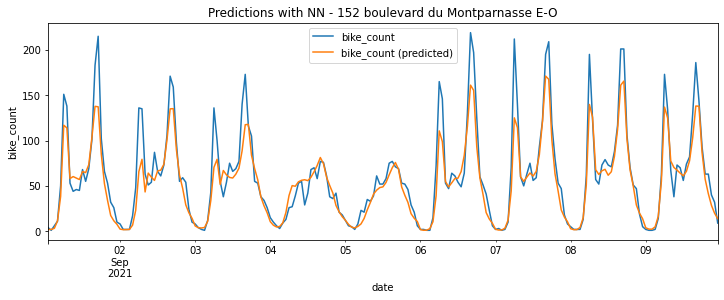

In [177]:
mask = ((X_test['counter_name'] == '152 boulevard du Montparnasse E-O')
        & (X_test['date'] > pd.to_datetime('2021/09/01'))
        & (X_test['date'] < pd.to_datetime('2021/09/15')))

df_viz = X_test.loc[mask].copy()
df_viz['bike_count'] = np.exp(y_test[mask.values]) - 1
df_viz['bike_count (predicted)'] = np.exp(pipe.predict(X_test[mask])) -  1
fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='bike_count', ax=ax)
df_viz.plot(x='date', y='bike_count (predicted)', ax=ax)
ax.set_title('Predictions with NN - 152 boulevard du Montparnasse E-O')
ax.set_ylabel('bike_count')